In [186]:
Do not execute this step.
# Following steps done to get the model and improve using Ridge and Lasso.
###
1. load csv
2. NA count on the list of features.
3. For categorical feature set NA to NONE, and for numeric the mean value is set. ( assumption no domain knowledge on realestate)
this set to all features listed in point 2.
4. For above categorical object type columns got the dummies, which returned True/False. numeric value is set 1:True, 0:False
5. Post NA fix for all columns, go the complete list of objects on above updated  dataset, used label encoder for all the columns 
6. For all the columns for the columns the values set to NONE , got the dummies and in a temporary dataframe and and the values returen in this dataset post label_encoder, is applied to the mail dataset.
7. Concated the dummies with the parent dataset and droped all columns post fix with NONE name(while getting the dummies) and
   Dropped the categorical columns of object type post dummies operation.
8. CO-relation matrix generated from the last concated dataset.
9. Saved in excel sheet and later did conditionlal filtering with values found >.7. to find all the columsn that may go for the model development.
10.Generated MSE for the above model.
11.Using stats model OSL, generated the model summary of the linear regressiono
12.Removed all columns that has P-values >= .5
13.The final model created from the above step used for Ridge and Lasso approach to get the lowest error.
14.
# Create a parameter grid for Lasso regression
lasso_param_grid = {
    'lasso__alpha': [0.1, 1.0, 5.0,10.0,20.0,30, 50, 100, 500,1000,10000]  # Add other alpha values as needed
}
Best Ridge Model Alpha: 30
Best Lasso Model Alpha: 100
15. The new  model with coefficients of above created.
16. Residual plot is generated  residual vs Predicted value
    squared residual vs Predicted values generated.
###

In [212]:
# import all the python packages needed for the project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing  import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
#from google.colab import files
#upload = files.upload()
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from scipy.stats import norm
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

houses=pd.read_csv("train.csv")

In [213]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [214]:
#?  sns.scatterplot
houses_num = houses.select_dtypes(include=['int64', 'float64'])
houses_cat = houses.select_dtypes(include=['object'])
print(houses_num.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


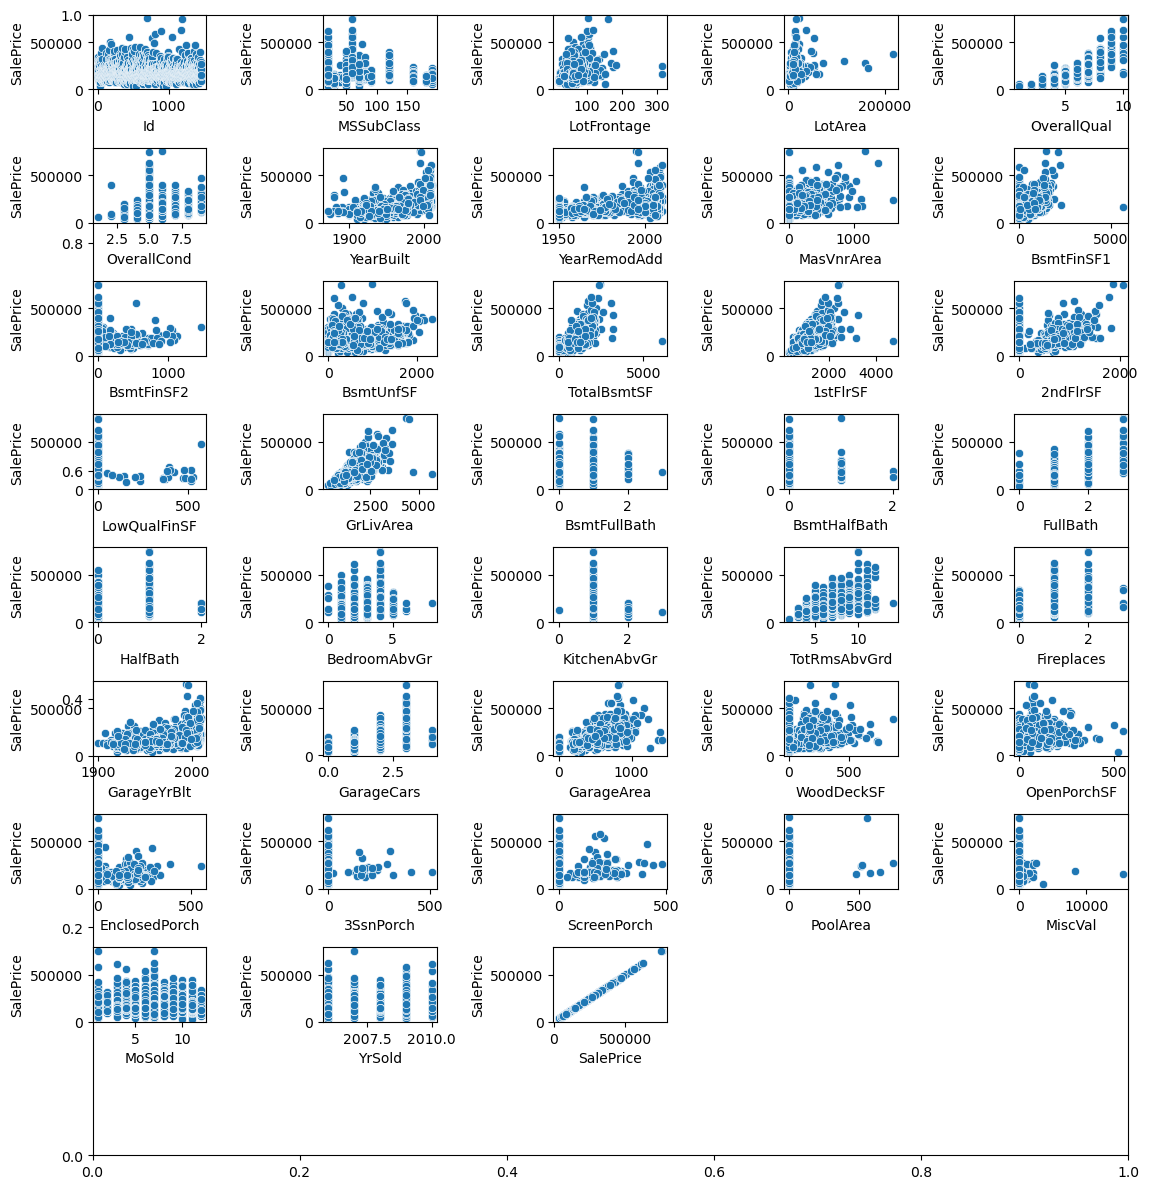

In [140]:
fig=plt.subplots(figsize=(12, 12))

#for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
for i, feature in enumerate(houses_num.columns):
    plt.subplot(9, 5, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=houses[feature], y=houses['SalePrice'])
    plt.tight_layout()

In [215]:
housing_df=houses
outliers_percentage={}
houses_num = houses.select_dtypes(include=['int64', 'float64'])
numeric_df=houses_num
houses_cat = houses.select_dtypes(include=['object'])

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
   
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)
 

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


In [216]:


for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [217]:
houses_numeric = houses.select_dtypes(include=['int64', 'float64'])
categorical_df = houses.select_dtypes(include=['object'])


In [ ]:
plt.figure(figsize=(30,26))
sns.heatmap(houses_numeric.corr(),annot=True)
plt.show()

In [209]:
for i in range(0, len(housing_df.columns), 10):
    subset_of_columns = housing_df.iloc[:, i:i+10]
    description = subset_of_columns.describe()
    
    print(f"Summary statistics for columns {i+1} to {i+10}:")
    print(description)
    print("\n")

Summary statistics for columns 1 to 10:
        MSSubClass     MSZoning  LotFrontage       LotArea       Street  \
count  1452.000000  1452.000000  1452.000000   1452.000000  1452.000000   
mean     55.127410     3.033058    69.110460   9643.372590     0.995868   
std      37.526939     0.626991    17.816536   3592.659142     0.064172   
min      20.000000     0.000000    27.500000   1481.500000     0.000000   
25%      20.000000     3.000000    60.000000   7538.750000     1.000000   
50%      50.000000     3.000000    69.110460   9478.500000     1.000000   
75%      70.000000     3.000000    79.000000  11600.000000     1.000000   
max     145.000000     4.000000   111.500000  17673.500000     1.000000   

             Alley     LotShape  LandContour    LotConfig    LandSlope  
count  1452.000000  1452.000000  1452.000000  1452.000000  1452.000000  
mean      0.993113     1.940771     2.776171     3.018595     0.062672  
std       0.248955     1.409553     0.709420     1.623080     0.2

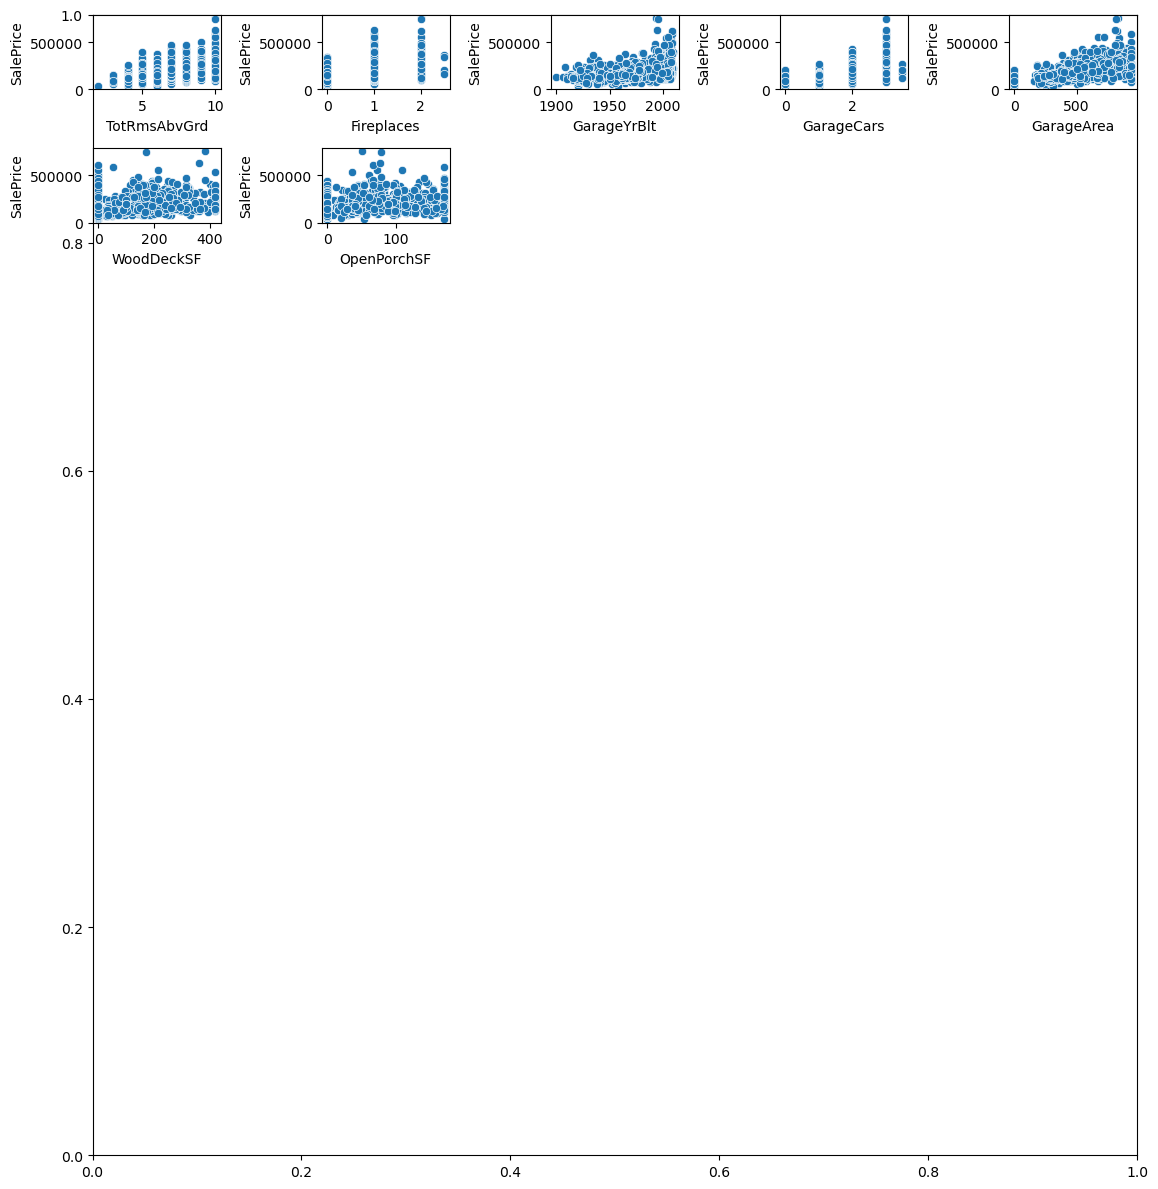

In [144]:
fig=plt.subplots(figsize=(12, 12))

#for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea']):
#for i, feature in enumerate(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr']):
for i, feature in enumerate(['TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF'           
]):
    plt.subplot(9, 5, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=houses[feature], y=houses['SalePrice'])
    plt.tight_layout()

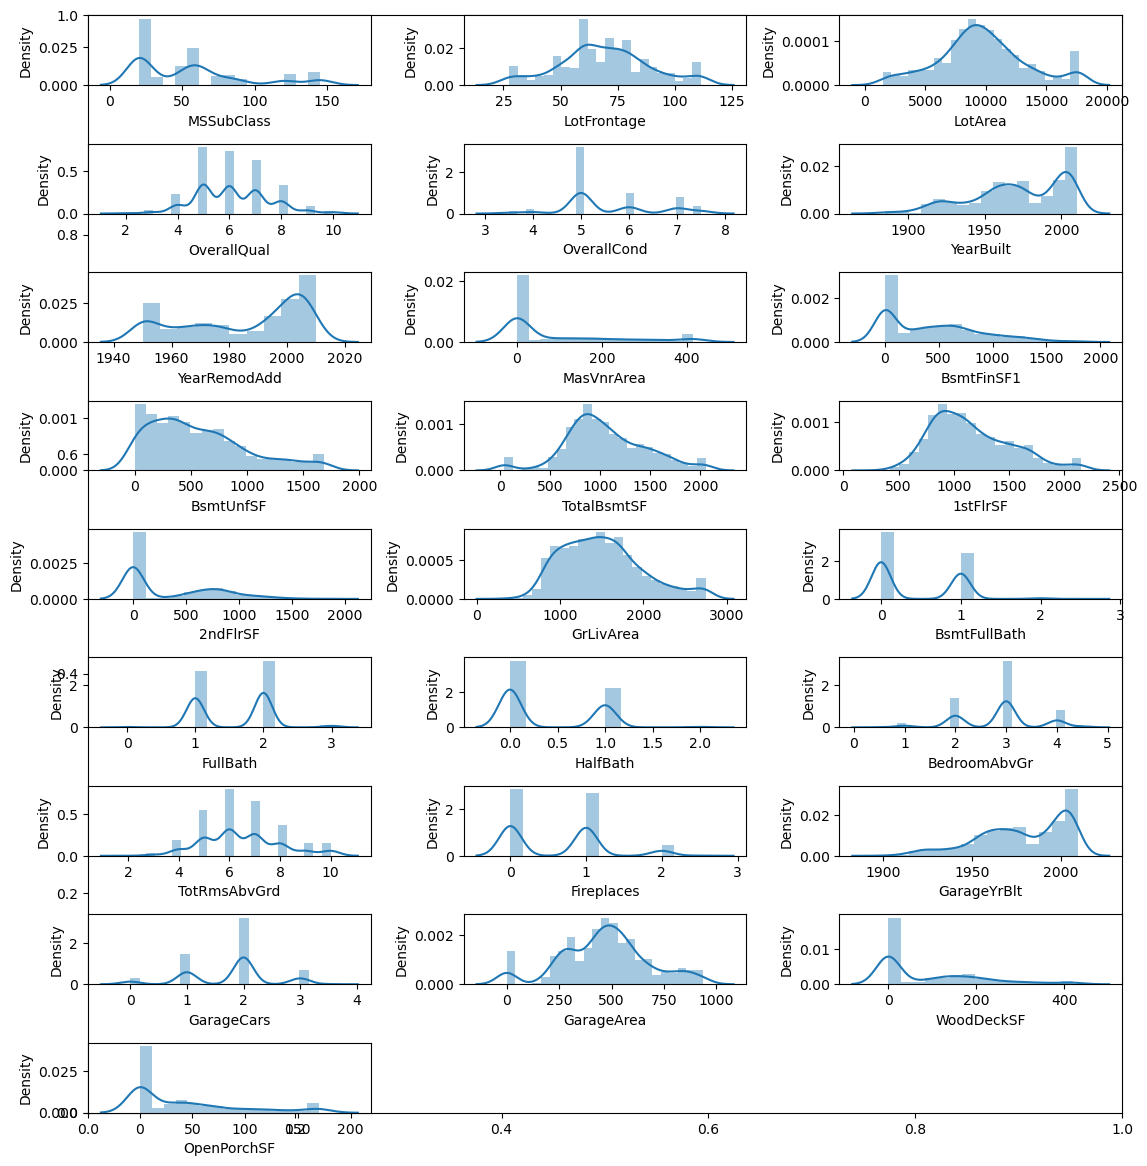

In [145]:
  
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',	'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [218]:
housing_df.drop(['Utilities','MiscVal','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','HalfBath','KitchenAbvGr'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', '

In [219]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,2,3.0,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,2,3.0,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,2,3.0,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,1,3.0,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,2,4.0,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,2,3.0,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,2,3.0,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,2,4.0,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,1,2.0,5,0.0,1950.0,1950,1996


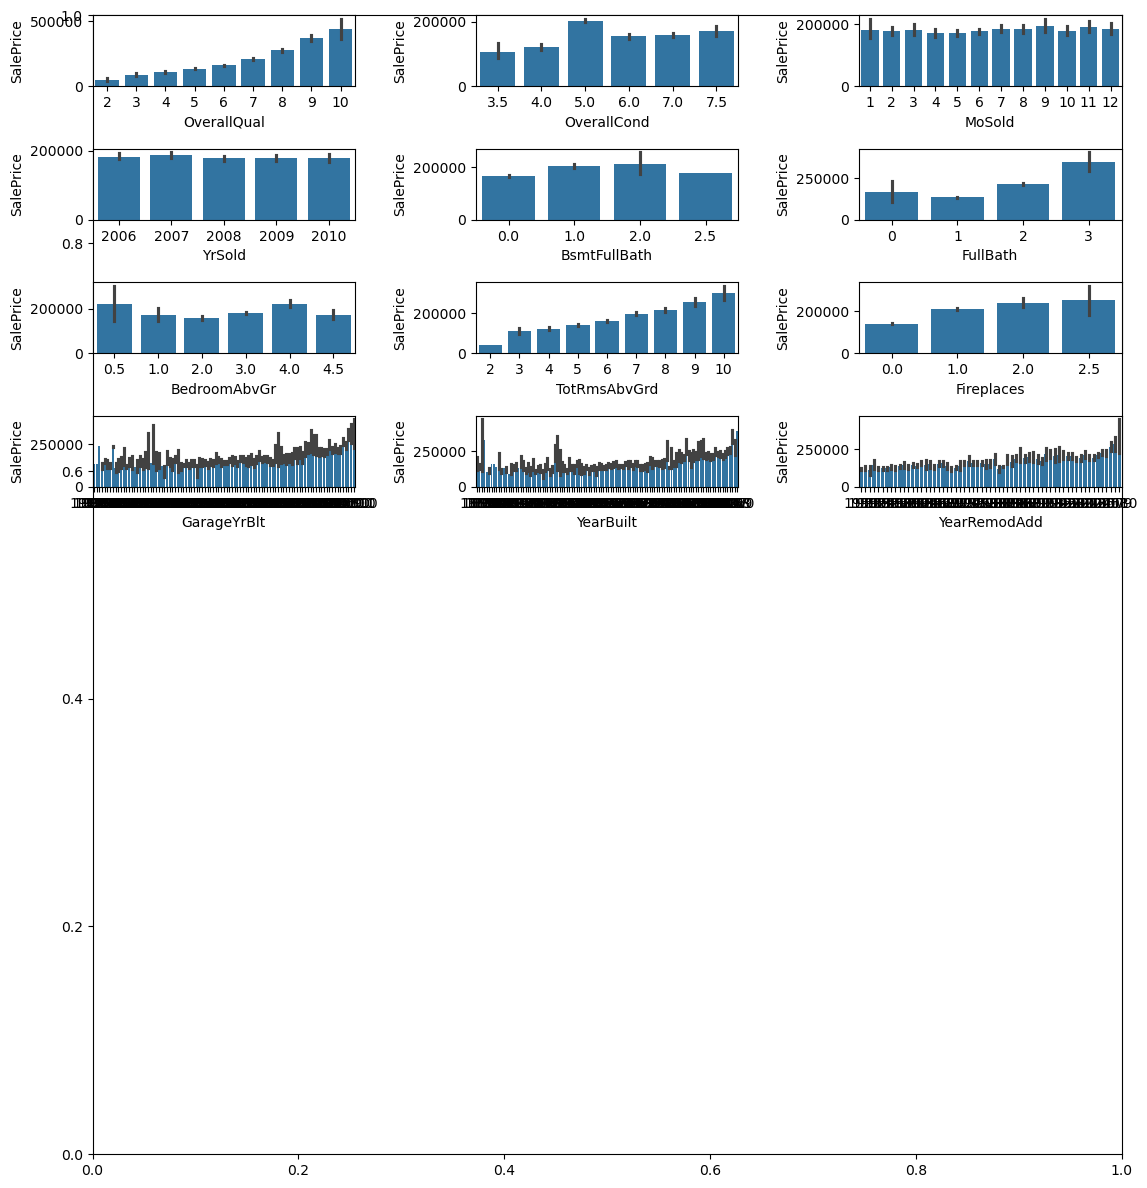

In [148]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

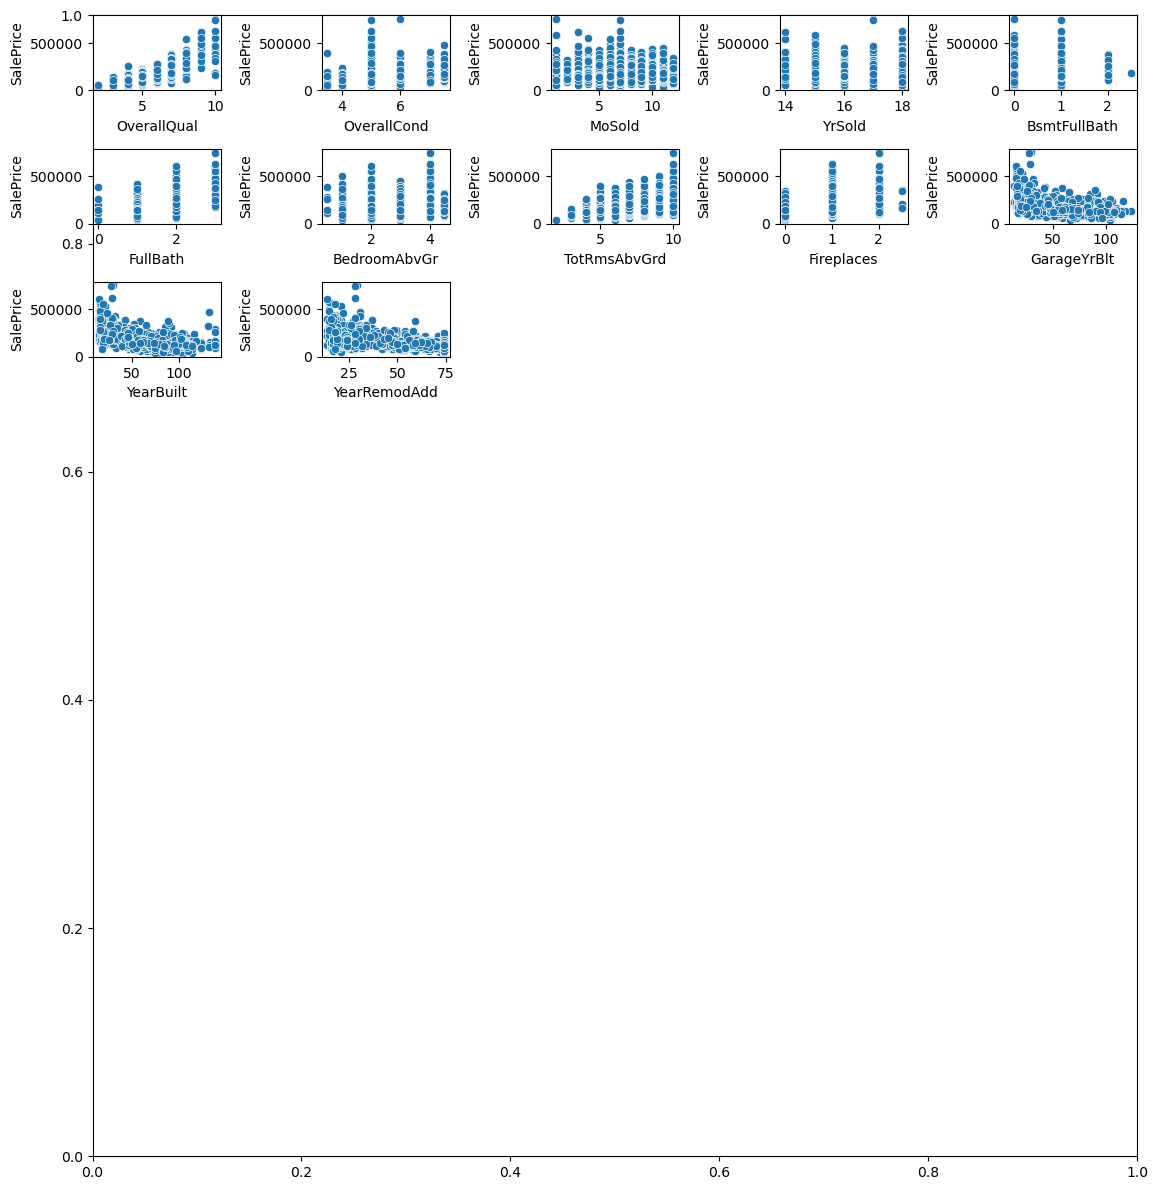

In [152]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 5, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

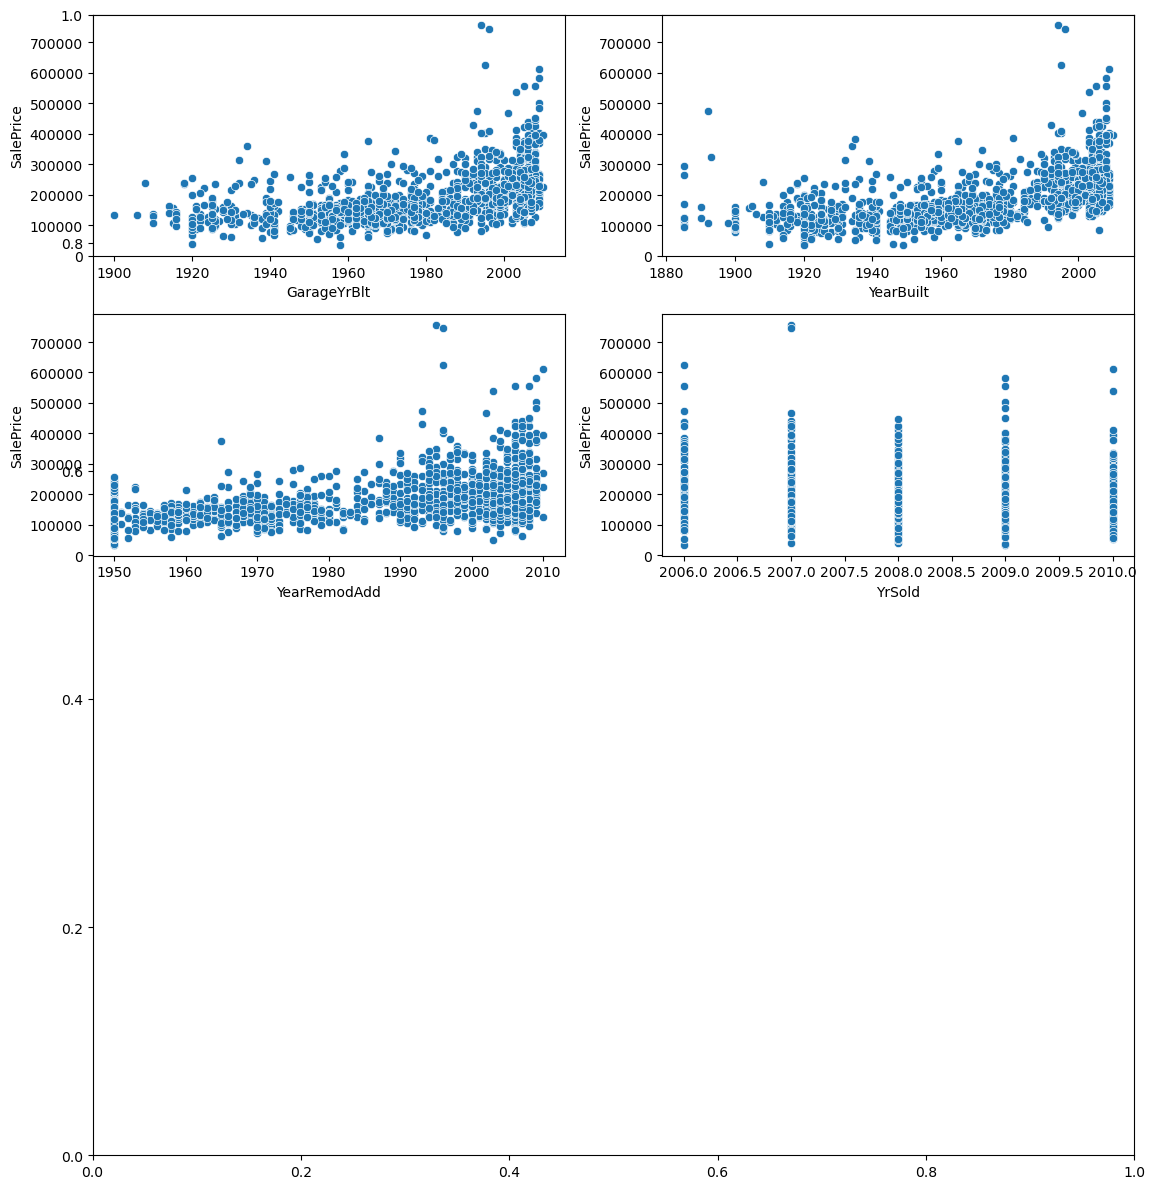

In [153]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2024 - housing_df[feature]
    
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

In [220]:
print(" Missing Value")

for feat in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)
        
housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]
#housing_df = housing_df.drop(['Id'], axis=1)
#numeric_df= numeric_df.drop(['Id'], axis=1)


 Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [221]:
# they have cp-frelation with other hence droping them
housing_df=housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1)
print(housing_df.columns.shape)

(66,)


In [222]:
print(housing_df.columns.shape)

(66,)


In [223]:
# List all NA columns with their count

null_count_per_column= housing_df.isnull().sum().sort_values(ascending=False)
non_zero_null_counts = null_count_per_column[null_count_per_column != 0]
non_zero_null_counts


PoolQC          1445
MiscFeature     1398
Alley           1362
Fence           1171
MasVnrType       864
FireplaceQu      686
LotFrontage      257
GarageFinish      81
GarageQual        81
GarageCond        81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
Electrical         1
dtype: int64

In [224]:
# Fix all NA values of the above reports numbers for the columns

#selected_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
 #                   'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish',
 #                   'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
 #                   'BsmtFinType1', 'MasVnrArea', 'Electrical']
selected_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
                    'LotFrontage', 'GarageCond', 'GarageType', 'GarageFinish',
                    'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
                    'BsmtFinType1', 'MasVnrArea', 'Electrical']

#Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')
housing_df['LotFrontage']=housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].mean())
#housing_df['GarageYrBlt']=housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mean())
housing_df['MasVnrArea']=housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].mean())


housing_df['PoolQC'] = housing_df['PoolQC'].fillna('NONE')
housing_df['Alley'] = housing_df['Alley'].fillna('NONE')
housing_df['Fence'] = housing_df['Fence'].fillna('NONE')
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].fillna('NONE')
housing_df['GarageCond'] = housing_df['GarageCond'].fillna('NONE')
housing_df['GarageType'] = housing_df['GarageType'].fillna('NONE')
housing_df['GarageFinish'] = housing_df['GarageFinish'].fillna('NONE')
housing_df['GarageQual'] = housing_df['GarageQual'].fillna('NONE')
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].fillna('NONE')
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].fillna('NONE')
housing_df['BsmtQual'] = housing_df['BsmtQual'].fillna('NONE')
housing_df['BsmtCond'] = housing_df['BsmtCond'].fillna('NONE')
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].fillna('NONE')
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('NONE')
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna('NONE')
#housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna('NONE')
housing_df['MiscFeature'] = housing_df['MiscFeature'].fillna('NONE')
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna('NONE')
housing_df['Electrical'] = housing_df['Electrical'].fillna('NONE')

In [225]:
# List all NA columns with their count

null_count_per_column= housing_df.isnull().sum().sort_values(ascending=False)
non_zero_null_counts = null_count_per_column[null_count_per_column != 0]
non_zero_null_counts

Series([], dtype: int64)

In [226]:
# Create a LabelEncoder object
houses_cat = housing_df.select_dtypes(include=['object'])
houses_cat_cols = houses_cat.columns

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in houses_cat_cols:
    housing_df[column] = label_encoder.fit_transform(houses_cat[column])



In [227]:
housing_df.shape

(1452, 66)

In [231]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450.0,1,1,3,3,4,...,0,61,3,4,1,2,2008,8,4,208500
1,2,20,3,80.0,9600.0,1,1,3,3,2,...,298,0,3,4,1,5,2007,8,4,181500
2,3,60,3,68.0,11250.0,1,1,0,3,4,...,0,42,3,4,1,9,2008,8,4,223500
3,4,70,3,60.0,9550.0,1,1,0,3,0,...,0,35,3,4,1,2,2006,8,0,140000
4,5,60,3,84.0,14260.0,1,1,0,3,2,...,192,84,3,4,1,12,2008,8,4,250000


In [229]:
# Describe the Data
# Convert the categories to Dummies, Delete the cateogerical columns and concat created dummeies with main dataset.

#house_object.info()

houses_dummies = pd.get_dummies(houses_cat, drop_first=True)
print(houses_dummies.columns)
#housing_df=housing_df.drop(columns=houses_cat_cols)
#housing_df = pd.concat([housing_df, houses_dummies], axis=1)
#houses = houses.replace({True: 1, False: 0})
#houses.to_csv('houses_dummies.csv')
#houses.info()
#houses.describe()

#houses_tmp.info()

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_NONE', 'Alley_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=223)


In [233]:
houses_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NONE,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [232]:
houses_dummies=houses_dummies.replace({True: 1, False: 0})

In [166]:

housing_df.shape

(1452, 65)

In [234]:
houses_dummies.shape

(1452, 223)

In [235]:
dummies_tmp = []
for col in houses_dummies.columns:
    if houses_dummies[col].value_counts()[0]/houses_dummies.shape[0] >= 0.95:
        dummies_tmp.append(col)
        
print(dummies_tmp)
print(len(dummies_tmp))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Memb

In [236]:
# Dropping the highly imbalanced dummy variables

houses_dummies = houses_dummies.drop(dummies_tmp, axis=1)

print(houses_dummies.shape)

(1452, 88)


In [247]:
# Adding the dummy variables to the original dataframe

housing_tmp = housing_df
housing_tmp = pd.concat([housing_df,houses_dummies],axis=1)
housing_tmp1 = pd.concat([housing_df,houses_dummies],axis=1)


In [248]:
#housing_tmp.SalePrice.mean()
housing_tmp1.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,GarageCond_TA,PavedDrive_Y,PoolQC_NONE,Fence_MnPrv,Fence_NONE,MiscFeature_NONE,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,1,60,3,65.0,8450.0,1,1,3,3,4,...,1,1,1,0,1,1,0,1,1,0
1,2,20,3,80.0,9600.0,1,1,3,3,2,...,1,1,1,0,1,1,0,1,1,0
2,3,60,3,68.0,11250.0,1,1,0,3,4,...,1,1,1,0,1,1,0,1,1,0
3,4,70,3,60.0,9550.0,1,1,0,3,0,...,1,1,1,0,1,1,0,1,0,0
4,5,60,3,84.0,14260.0,1,1,0,3,2,...,1,1,1,0,1,1,0,1,1,0


In [249]:

# Dropping the redundant columns
housing_tmp1 = housing_tmp1.drop(houses_cat_cols,axis=1)

In [250]:
housing_tmp1.shape
housing_tmp1.columns
housing_tmp1.SalePrice.mean()

180615.06336088156

In [251]:
house_tmp=housing_df
#y = housing_tmp[['SalePrice']]
y = np.log(housing_df['SalePrice'])
X = housing_tmp1.drop(['SalePrice'],axis=1)
#X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [252]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1161, 111)
(291, 111)
(1161,)
(291,)


In [253]:
y_train.values
X_train.values
X_train.head()
print(X_train.info())
print(X_train.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 1161 entries, 1251 to 866
Columns: 111 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(100)
memory usage: 1015.9 KB
None
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'GarageCond_TA', 'PavedDrive_Y', 'PoolQC_NONE', 'Fence_MnPrv',
       'Fence_NONE', 'MiscFeature_NONE', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=111)


In [254]:
# List all NA columns with their count

null_count_per_column= housing_tmp1.isnull().sum().sort_values(ascending=False)
non_zero_null_counts = null_count_per_column[null_count_per_column != 0]
non_zero_null_counts

Series([], dtype: int64)

In [255]:
X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_Y,PoolQC_NONE,Fence_MnPrv,Fence_NONE,MiscFeature_NONE,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
305,306,20,80.0,10386.0,8,5.0,2004,2005,246.0,1464.0,...,1,1,1,0,1,1,0,1,1,0
338,339,20,91.0,14145.0,7,7.0,1984,1998,0.0,213.0,...,1,1,1,0,1,0,0,1,1,0
861,862,145,75.0,11625.0,5,4.0,1965,1965,0.0,841.0,...,1,1,1,0,1,1,0,1,1,0
198,199,75,92.0,5520.0,6,6.0,1912,1950,0.0,0.0,...,0,1,1,1,0,1,0,1,0,0
1304,1305,145,32.0,3363.0,7,5.0,2004,2004,117.0,0.0,...,1,1,1,0,1,1,0,1,1,0


In [256]:
#y_train.values.reshape(-1,1)
#X_train=X_train.values.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1161, 111)
(291, 111)
(1161,)
(291,)


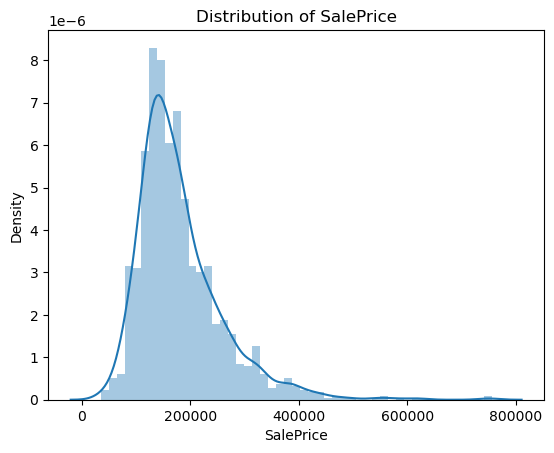

In [257]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_tmp1['SalePrice'])
plt.show()

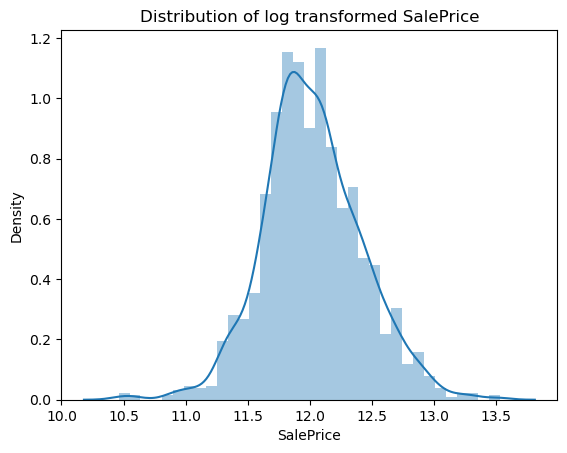

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1452, dtype: float64


In [259]:
sns.distplot(np.log(housing_tmp1['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()
y = np.log(housing_tmp1['SalePrice'])
print(y)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [261]:
X_train.values

array([[1.25200000e+03, 1.20000000e+02, 6.91104603e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.94000000e+02, 1.45000000e+02, 2.75000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.64000000e+02, 2.00000000e+01, 7.00000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [6.02000000e+02, 5.00000000e+01, 5.00000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.37000000e+03, 2.00000000e+01, 4.80000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.67000000e+02, 2.00000000e+01, 6.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [264]:
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing  import MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
sc_X_train=scaler.transform(X_train)
sc_X_test=scaler.transform(X_test)
X_sc_train = pd.DataFrame(data=sc_X_train, columns=X_train.columns)
X_sc_test = pd.DataFrame(data=sc_X_test, columns=X_test.columns)
print(X_sc_train)
print(X_sc_test)

            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0     1.224316    1.733674     0.004017 -1.807367     0.698423    -0.566913   
1    -1.286778    2.399281    -2.375991 -1.978857     0.698423    -0.566913   
2     0.303423   -0.928754     0.054897 -0.468123    -0.763920    -0.566913   
3    -1.063675   -0.928754     0.004017 -0.413939    -1.495091    -1.596937   
4    -0.574747   -0.928754     0.054897 -0.468123    -0.763920     0.463112   
...        ...         ...          ...       ...          ...          ...   
1156  1.637294   -0.928754     0.626870  0.311124    -0.032748     0.463112   
1157 -1.566843    2.399281    -2.375991 -2.237489    -1.495091    -0.566913   
1158 -0.318416   -0.130026    -1.089050 -0.169551    -0.032748     0.463112   
1159  1.504381   -0.928754    -1.203445  0.287105     1.429594    -0.566913   
1160  0.310544   -0.928754    -0.116695  0.292970     1.429594    -0.566913   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinS

In [277]:
? RFE

In [278]:
from sklearn.feature_selection import RFE
def get_features(n):
    cols = []
    
    lr = LinearRegression()
    lr.fit(X_sc_train, y_train)
    rfe = RFE(lr,n_features_to_select=n)
    rfe = rfe.fit(X_sc_train, y_train)
    
   
    rfe = list(zip(X_sc_train.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe:
        if i[1]:
            cols.append(i[0])
    print(cols)
    return cols

In [283]:
# Checking top 45, 50 and 55 features
top_10 = get_features(10)
top_20 = get_features(20)
top_30 = get_features(30)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'Foundation_PConc', 'SaleCondition_Partial']
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Foundation_PConc', 'Functional_Typ', 'SaleCondition_Normal', 'SaleCondition_Partial']
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'MasVnrType_BrkFace', 'MasVnrType_NONE', 'MasVnrType_Stone', 'Foundation_PConc', 'Functional_Typ', 'SaleType_New', 'SaleCondition_Normal', 'Sale

In [273]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def getsummary(X_train,y_train,columns):
    X_sm = sm.add_constant(X_train[columns])
    lin = sm.OLS(y_train.values.reshape(-1,1), X_sm).fit()
    print(lin.summary()) 

In [284]:
getsummary(X_sc_train,y_train,top_10)
getsummary(X_sc_train,y_train,top_20)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     775.9
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:51:02   Log-Likelihood:                 632.72
No. Observations:                1161   AIC:                            -1243.
Df Residuals:                    1150   BIC:                            -1188.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

In [288]:
y_train

1251    12.053795
193     11.775290
863     11.794338
287     11.385092
493     11.951180
          ...    
1425    11.863582
75      11.418615
601     11.856515
1369    12.354493
866     12.424806
Name: SalePrice, Length: 1161, dtype: float64

In [328]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def get_ml(X_train, y_train, X_test, parameters, ml):
  if ml == 'ridge':
    model = Ridge()
  else:
    model = Lasso()
  cv = GridSearchCV(estimator = model, 
                          param_grid = parameters, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  cv.fit(X_train, y_train)
  al = cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, al))
  f_model = cv.best_estimator_

  f_model.fit(X_train, y_train)
  y_train_pred = f_model.predict(X_train)
  y_test_pred = f_model.predict(X_test)
 
  # Model Evaluation
  print(model," for alfa= ",al)
 
  print('R2score y_train : ',r2_score(y_train,y_train_pred))
  print('R2score y_test : ',r2_score(y_test,y_test_pred))
  print('mean_squared_error (y_train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('mean_squared_error (y_test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return f_model, y_test_pred, y_train_pred

In [329]:
params = {'alpha': np.logspace(-5, 5, num=100)}

ridge_model, y_test_rdg_predicted, y_train_rdg_pred = get_ml(X_sc_train, y_train, X_sc_test, params, 'ridge')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimum alpha for Ridge() is 23.101297
Ridge()  for alfa=  23.10129700083158
R2score y_train :  0.9082828786228985
R2score y_test :  0.9080030612348721
mean_squared_error (y_train) :  0.11827143778488118
mean_squared_error (y_test) :  0.13039944168015027


In [331]:

params = {'alpha': np.logspace(-5, 5, num=100)}

lasso_model, y_test_predicted_lasso,y_train_pred_lasso = get_ml(X_sc_train, y_train, X_sc_test, params, 'lasso')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimum alpha for Lasso() is 0.003352
Lasso()  for alfa=  0.003351602650938841
R2score y_train :  0.9020320218436748
R2score y_test :  0.9121262564240556
mean_squared_error (y_train) :  0.12223532772895537
mean_squared_error (y_test) :  0.12744376938335306


In [366]:
params = {'alpha': [46.202594]}
ridge_model, y_test_rdg_predicted, y_train_rdg_pred = get_ml(X_sc_train, y_train, X_sc_test, params, 'ridge')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for Ridge() is 46.202594
Ridge()  for alfa=  46.202594
R2score y_train :  0.9071615226559888
R2score y_test :  0.9081145550471084
mean_squared_error (y_train) :  0.11899224904280559
mean_squared_error (y_test) :  0.1303204002538135


In [367]:
params = {'alpha': [0.006704]}

lasso_model, y_test_predicted_lasso,y_train_pred_lasso = get_ml(X_sc_train, y_train, X_sc_test, params, 'lasso')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for Lasso() is 0.006704
Lasso()  for alfa=  0.006704
R2score y_train :  0.8953899319335854
R2score y_test :  0.9085550559682178
mean_squared_error (y_train) :  0.12631106908188974
mean_squared_error (y_test) :  0.13000764547790272


In [317]:
model_coefficients = pd.DataFrame(index=X_sc_test.columns)
model_coefficients.rows = X_sc_test.columns

model_coefficients['Ridge 23.101297'] = ridge_model.coef_
model_coefficients['Lasso 0.003352'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge 23.101297,Lasso 0.003352
Id,-0.003206,-0.000000
MSSubClass,-0.015713,-0.002608
LotFrontage,0.008813,0.004676
LotArea,0.026593,0.027990
OverallQual,0.076978,0.091544
OverallCond,0.048251,0.045153
YearBuilt,0.029777,0.035482
YearRemodAdd,0.013740,0.013079
MasVnrArea,-0.003251,-0.000000
BsmtFinSF1,0.038371,0.032061


In [332]:
test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:10])

[295486 220131 131457 118625 144930 129712 299619 220889 334523 101633]


In [321]:
model_coefficients[['Lasso 0.003352']].sort_values(by='Lasso 0.003352', ascending=False)

,Lasso 0.003352
1stFlrSF,0.114220
2ndFlrSF,0.098292
OverallQual,0.091544
OverallCond,0.045153
YearBuilt,0.035482
BsmtFinSF1,0.032061
LotArea,0.027990
GarageArea,0.025776
SaleCondition_Partial,0.025433
SaleCondition_Normal,0.019982


In [323]:
model_coefficients[['Lasso 0.003352']].sort_values(by='Lasso 0.003352', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'LotArea', 'GarageArea', 'SaleCondition_Partial',
       'SaleCondition_Normal'],
      dtype='object')

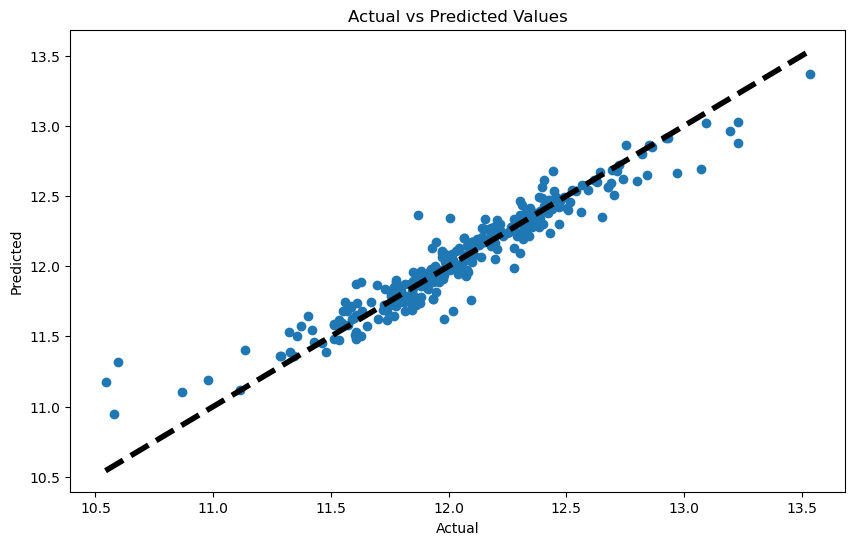

In [333]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predicted_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

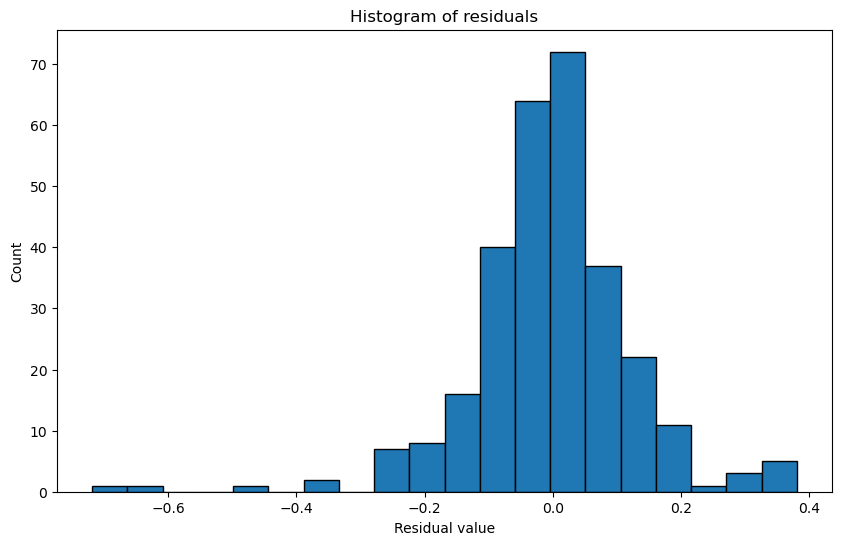

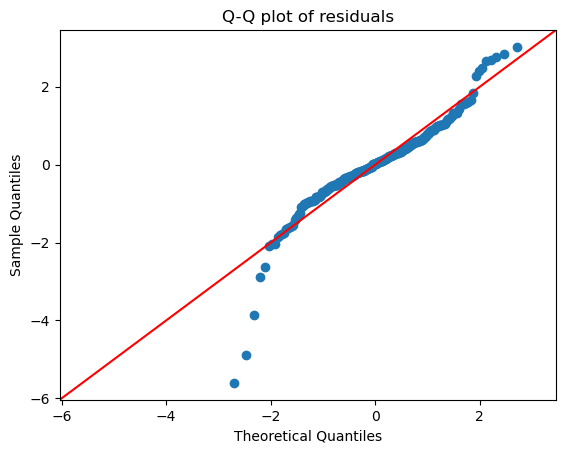

In [334]:
residuals = y_test - y_test_predicted_lasso
# Plot the histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.show()

# Q-Q plot of the residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of residuals')
plt.show()

Bias: 0.0149
Variance: 0.1482
MSE on Test Set: 0.0162


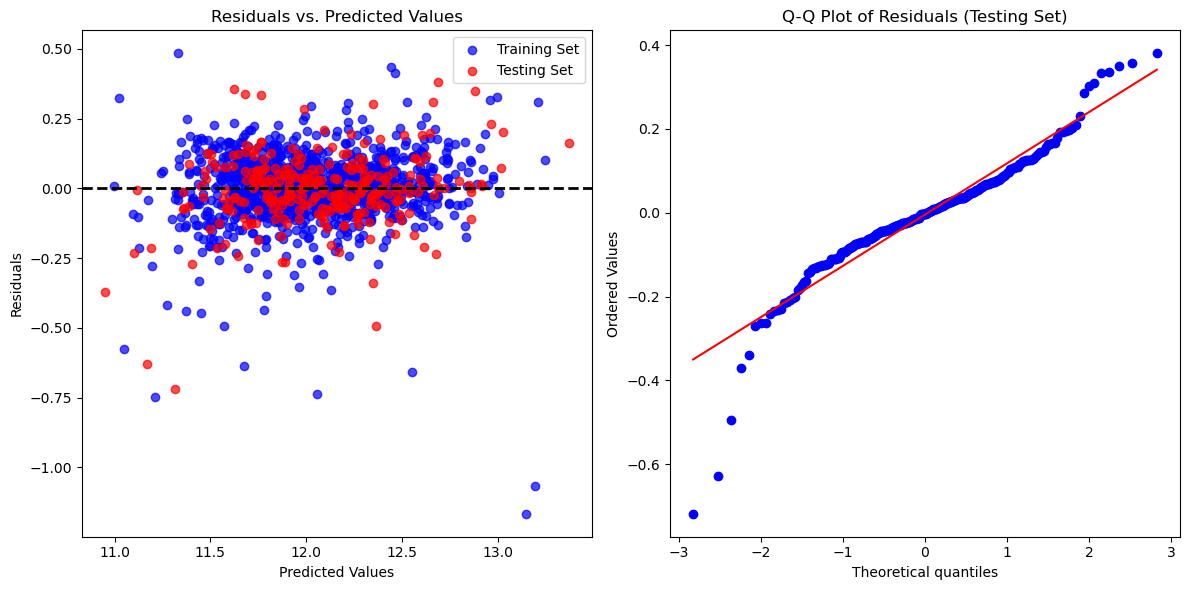

In [337]:
from scipy.stats import probplot
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing sets

# Calculate bias and variance
bias = np.mean((y_train_pred_lasso - y_train)**2)
variance = np.mean((y_test_predicted_lasso - np.mean(y_test_predicted_lasso))**2)
mse = mean_squared_error(y_test, y_test_predicted_lasso)

print("Bias: {:.4f}".format(bias))
print("Variance: {:.4f}".format(variance))
print("MSE on Test Set: {:.4f}".format(mse))

# Plot the residuals
residuals_train = y_train - y_train_pred_lasso
residuals_test = y_test - y_test_predicted_lasso

plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values (Homoscedasticity check)
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_lasso, residuals_train, color='blue', alpha=0.7, label='Training Set')
plt.scatter(y_test_predicted_lasso, residuals_test, color='red', alpha=0.7, label='Testing Set')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

# Q-Q plot (Normality check)
plt.subplot(1, 2, 2)
probplot(residuals_test, plot=plt)
plt.title('Q-Q Plot of Residuals (Testing Set)')

plt.tight_layout()
plt.show()

In [338]:
# Re-confirming if there are any null in the features.

print(X_train.isnull().sum())

print(y_train.isnull().sum())
print(X_test.isnull().sum())

print(y_test.isnull().sum())

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtUnfSF                0
1stFlrSF                 0
2ndFlrSF                 0
BsmtFullBath             0
FullBath                 0
BedroomAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
MoSold                   0
YrSold                   0
MSZoning_RL              0
MSZoning_RM              0
Street_Pave              0
Alley_NONE               0
LotShape_Reg             0
LandContour_Lvl          0
LotConfig_CulDSac        0
LotConfig_Inside         0
Neighborhood_CollgCr     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_NAmes       0
Neighborhood_NWAmes      0
Neighborhood_NridgHt     0
N

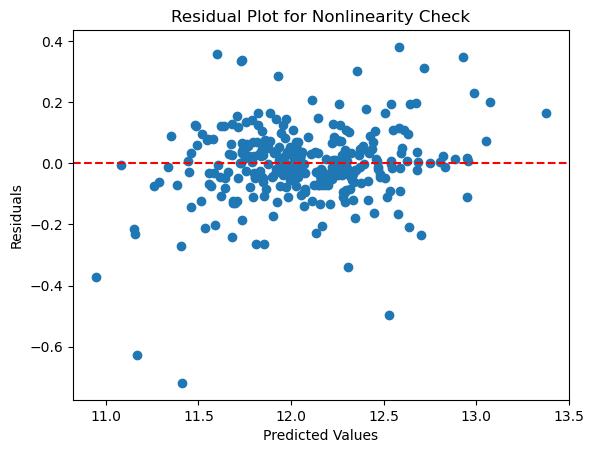

In [339]:

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predicted values and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred
residuals_train = y_train - y_train_pred_lasso
residuals_test = y_test - y_test_predicted_lasso

# Plot residuals against predicted values
plt.scatter(y_pred, residuals_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Nonlinearity Check')
plt.show()


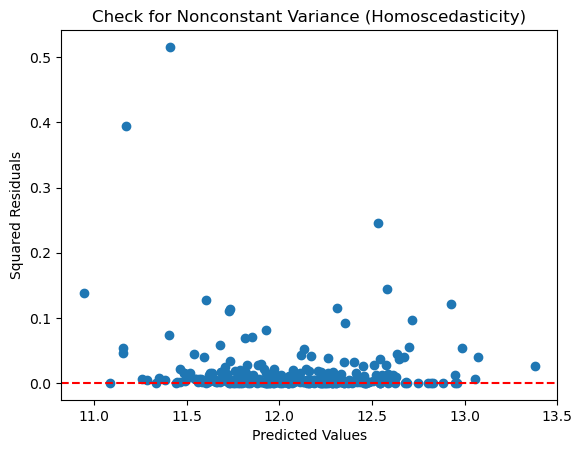

In [340]:
# Plot squared residuals against predicted values
plt.scatter(y_pred, residuals_test**2)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Squared Residuals')
plt.title('Check for Nonconstant Variance (Homoscedasticity)')
plt.show()

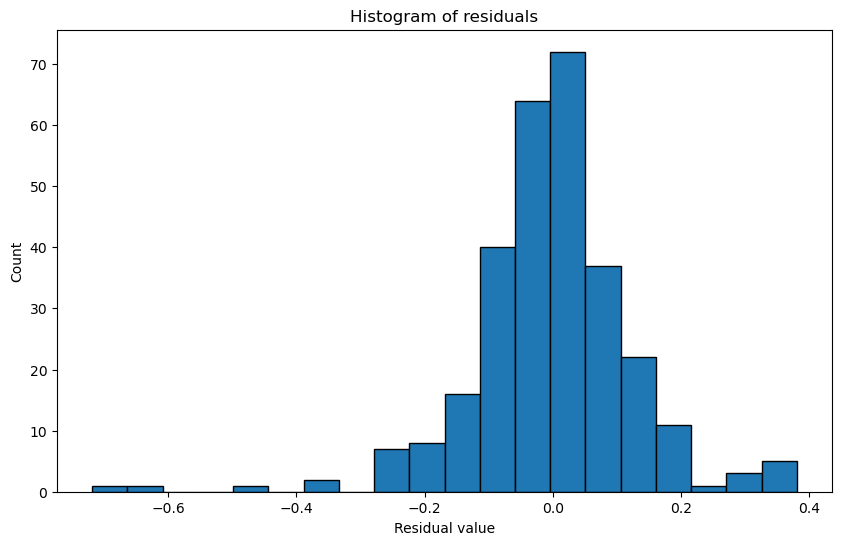

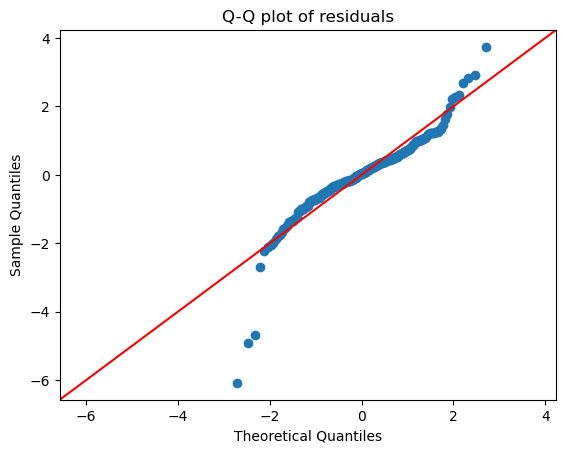

In [341]:
# Get the residuals


# Plot the histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_test, bins=20, edgecolor='k')
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.show()

# Q-Q plot of the residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of residuals')
plt.show()

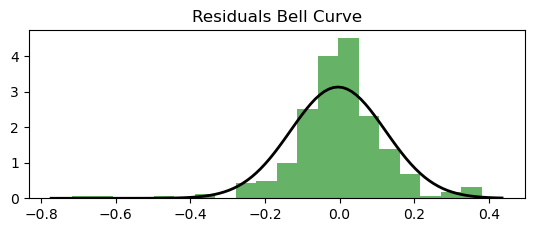

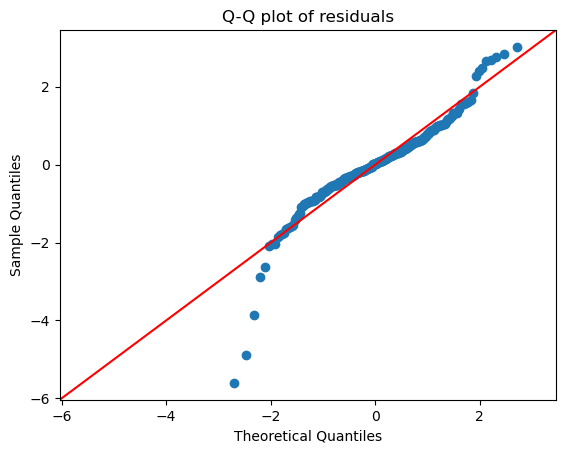

In [354]:
# There is a Positive skewness as shown in the distribution graph.
#Positive skewness might be caused by outliers in your data. 
#You could consider removing these outliers, or using a robust modeling method that is less sensitive to outliers.
# Get predicted values and residuals

# Apply a log transformation


y_pred = model.predict(X_test)
y_log = np.log1p(y_pred)
y_testlog = np.log1p(y_test)
residuals_train = y_train - y_train_pred_lasso
residuals_test = y_test - y_test_predicted_lasso
residuals = y_testlog - y_log

# Plot the histogram of the residuals
plt.subplot(2, 1, 2)
plt.hist(residuals_test, bins=20, density=True, alpha=0.6, color='g', label='Residuals Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(residuals_test), np.std(residuals_test))
plt.plot(x, p, 'k', linewidth=2, label='Residuals Bell Curve')
plt.title('Residuals Bell Curve')

# Q-Q plot of the residuals
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q plot of residuals')
plt.show()

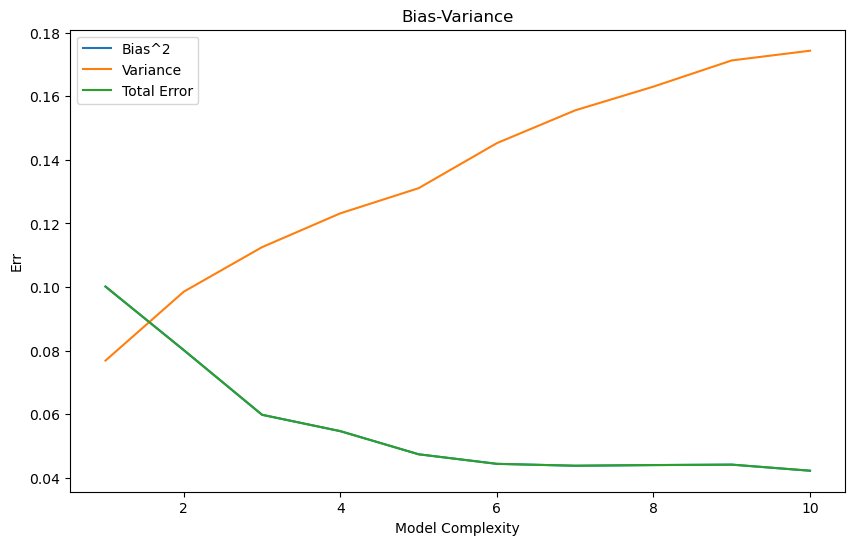

In [363]:

# Initialize bias, variance, and error lists
bias_squared_list, variance_list, error_list = [], [], []

# Define number of bootstrap samples to create
n_iterations = 10

# Define size of a bootstrap sample
size = int(0.9 * X.shape[0])

# Run bootstrap
for i in range(1, 11):
    # Initialize predictions list for this depth
    predictions = []
    # Create DecisionTreeRegressor at max_depth = i
    reg = DecisionTreeRegressor(max_depth=i)
    # Generate bootstrap samples and append predictions
    for _ in range(n_iterations):
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        predictions.append(y_pred)
    # Convert list to ndarray
    predictions = np.vstack(predictions).T
    # Calculate bias^2, variance, and error
    bias_squared = np.mean((y_test - np.mean(predictions, axis=1)) ** 2)
    variance = np.var(predictions)
    error = mean_squared_error(y_test, np.mean(predictions, axis=1))
    bias_squared_list.append(bias_squared)
    variance_list.append(variance)
    error_list.append(error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), bias_squared_list, label='Bias^2')
plt.plot(range(1, 11), variance_list, label='Variance')
plt.plot(range(1, 11), error_list, label='Total Error')

# Adding legend and titles
plt.legend(loc='best')
plt.xlabel('Model Complexity')
plt.ylabel('Err')
plt.title('Bias-Variance')
plt.show()